<a href="https://colab.research.google.com/github/maielsehet/similarity-Code-C-ASS/blob/main/Another_copy_of_Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:

df = pd.read_csv('cardio_train.csv', sep=';')

In [ ]:

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.isna().sum()

,0
id,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0


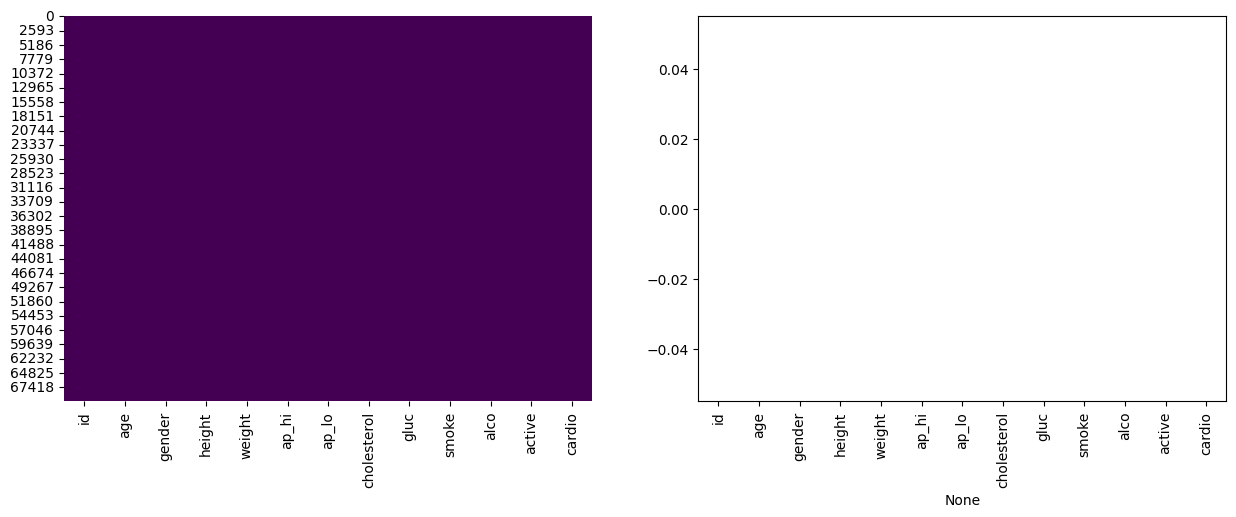

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(df.isna(), cbar=False, ax= ax[0], cmap='viridis')

missings = df.isna().sum()
sns.barplot(x=missings.index, y=missings.values, ax=ax[1])
ax[1].tick_params(axis='x', rotation=90)

plt.show()

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
#Handle outliers (ap_hi > 250, ap_lo > 200).
#Write reusable cleaning functions (clean_outliers()).
#Document logic behind thresholds.

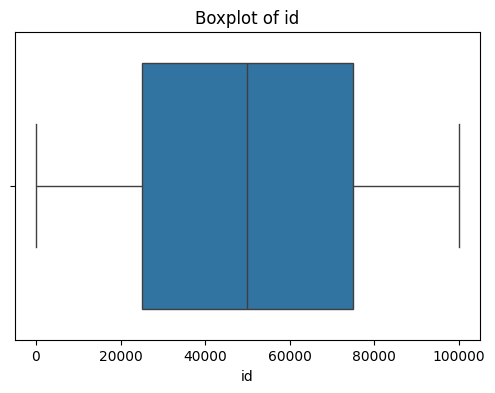

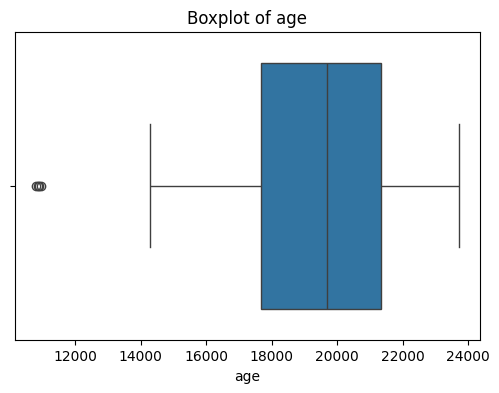

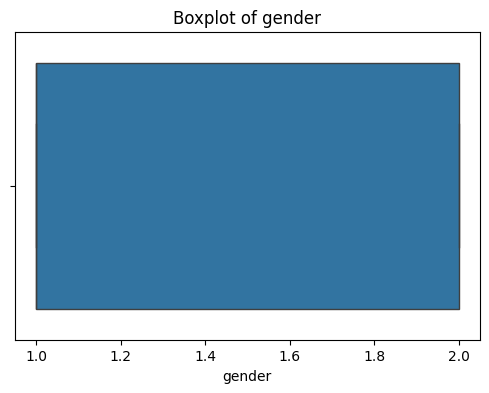

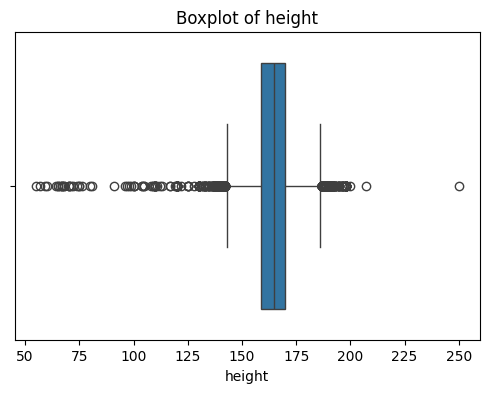

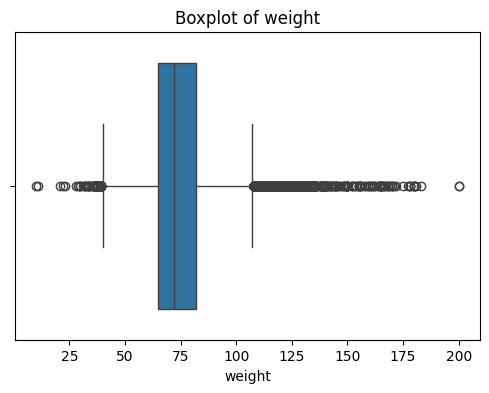

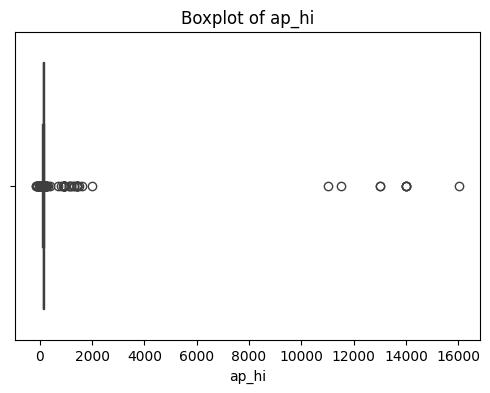

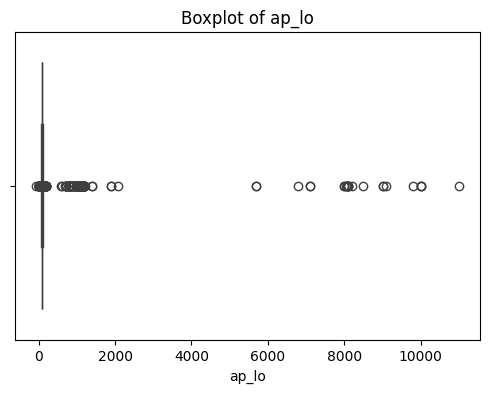

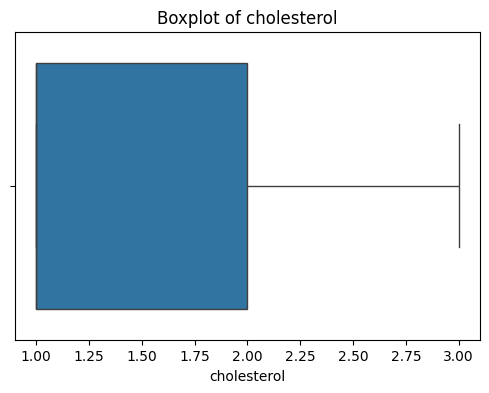

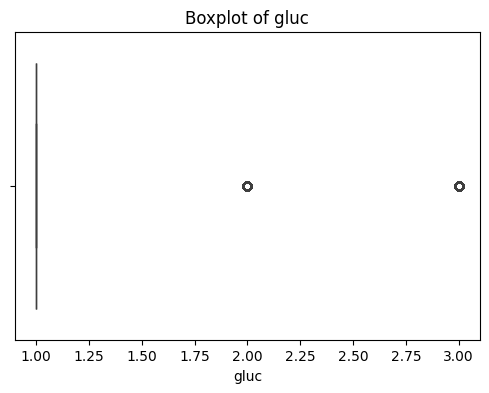

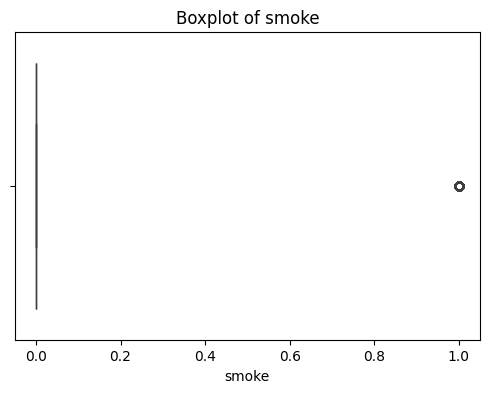

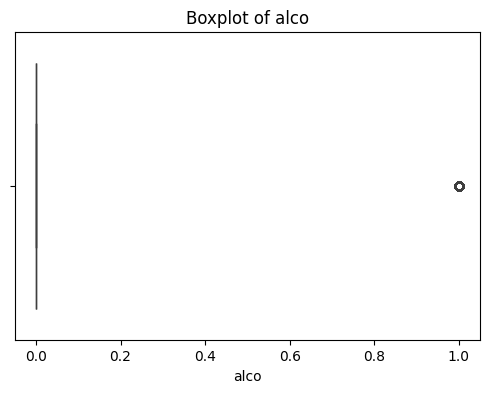

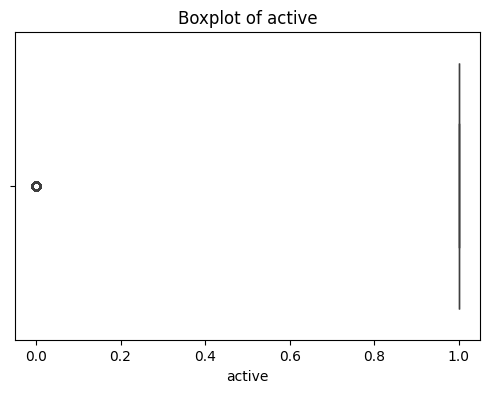

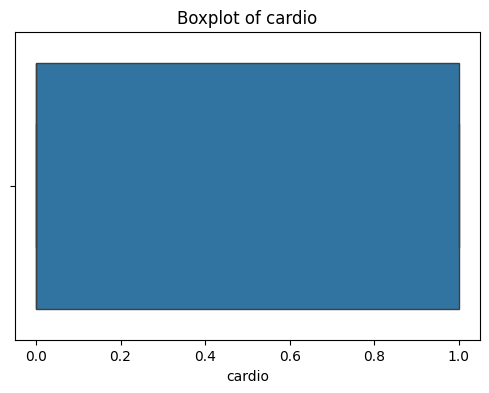

In [ ]:

for col in df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [ ]:

def clean_outliers(df):

    print("Initial dataset size:", df.shape)

    # Fixed thresholds for blood pressure
    df_clean = df[(df['ap_hi'] <= 250) & (df['ap_lo'] <= 200)]

    # IQR for numeric columns
    numeric_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns
    for col in numeric_cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

    print("Dataset size after removing outliers:", df_clean.shape)

    return df_clean


In [ ]:

df = clean_outliers(df)


Initial dataset size: (70000, 13)
Dataset size after removing outliers: (31449, 13)


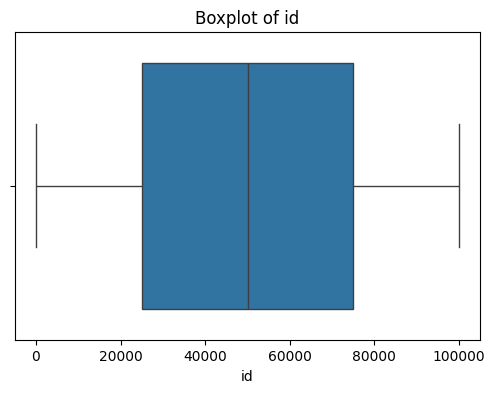

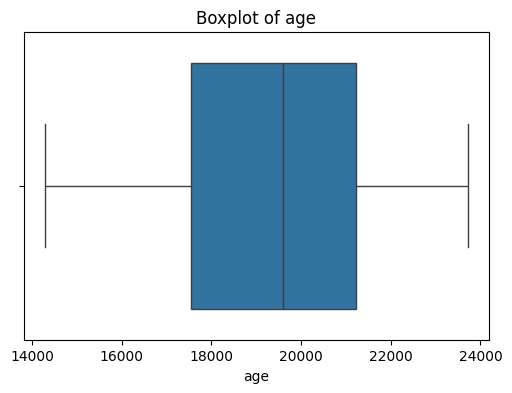

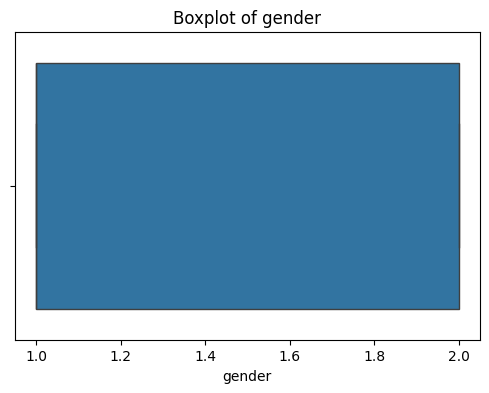

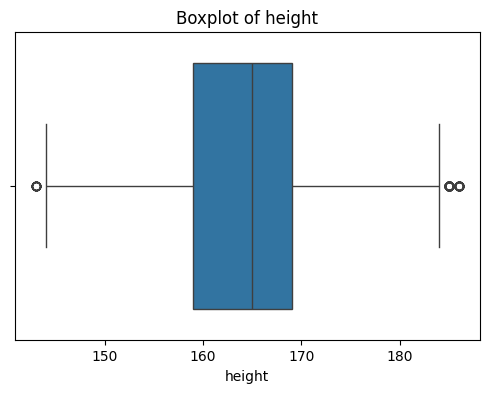

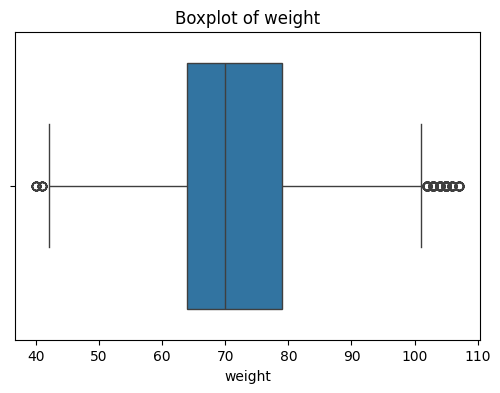

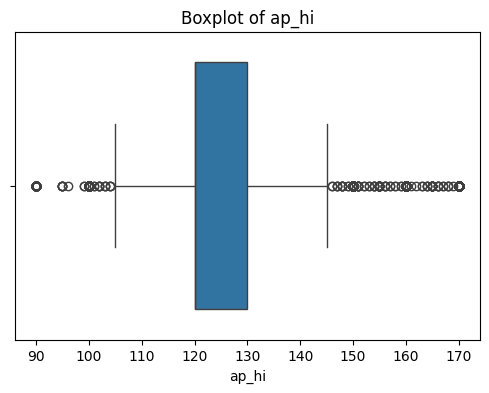

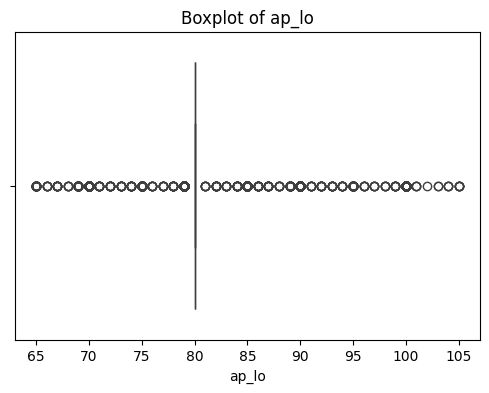

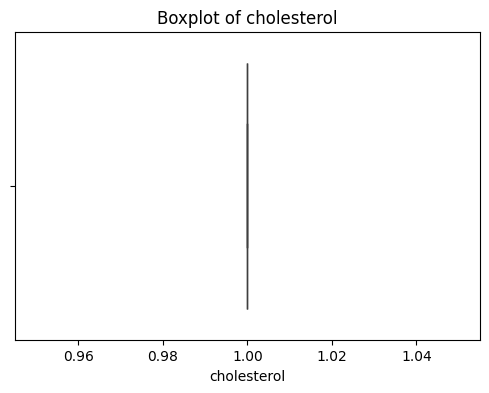

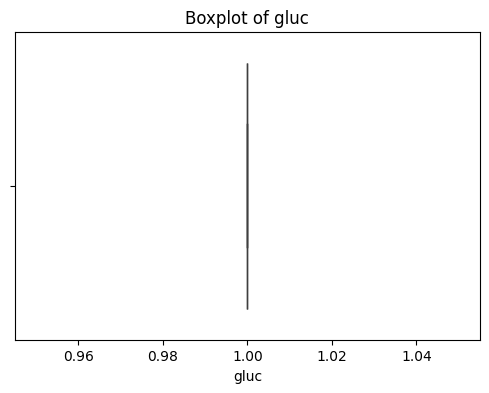

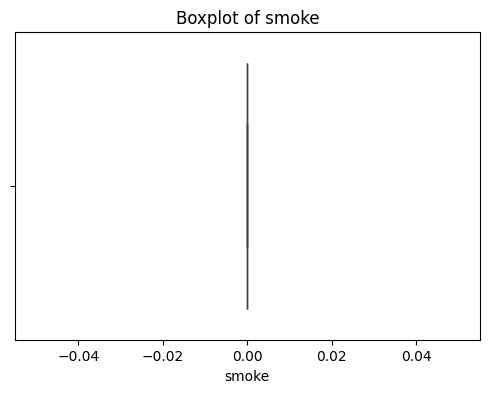

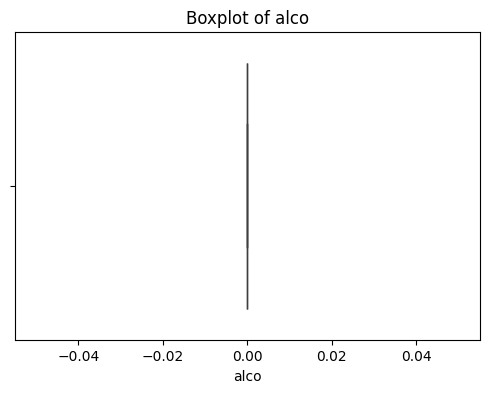

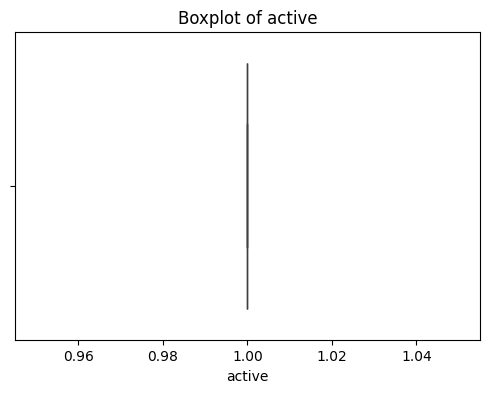

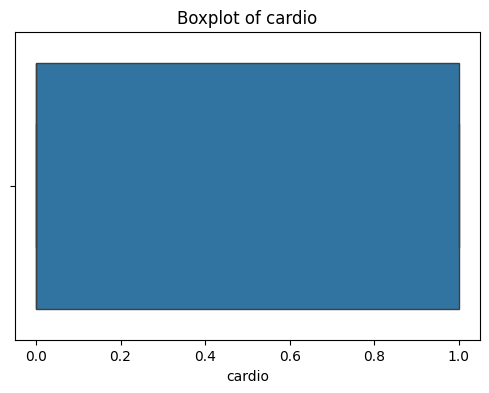

In [ ]:

for col in df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

### Encoding

In [ ]:
df.dtypes

,0
id,int64
age,int64
gender,int64
height,int64
weight,float64
ap_hi,int64
ap_lo,int64
cholesterol,int64
gluc,int64
smoke,int64


In [ ]:

df.drop('id', axis=1, inplace=True)

In [ ]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [ ]:
df["real_age"] = df["age"]

## cholesterol --> encoding

### values before encoding

In [ ]:

df['cholesterol'].unique()

array([1])

In [ ]:
!pip install category_encoders

In [ ]:

import category_encoders as ce

In [ ]:

ordinal_encoder= ce.OrdinalEncoder(cols=['cholesterol','gluc'],
                                  return_df=True,
                                   mapping=[
                                       {'col':'cholesterol','mapping':{1:0, 2:1, 3:2}}
                                   ])

In [ ]:

ordinal_encoder

OrdinalEncoder(cols=['cholesterol', 'gluc'],
               mapping=[{'col': 'cholesterol', 'data_type': dtype('int64'),
                         'mapping': 1    0
2    1
3    2
dtype: int64}])

In [ ]:

df = ordinal_encoder.fit_transform(df)

In [ ]:

df[['cholesterol']].head()

,cholesterol
0,0
3,0
8,0
10,0
11,0


### values after encoding

In [ ]:

df['cholesterol'].unique()

array([0])

Before Sampling

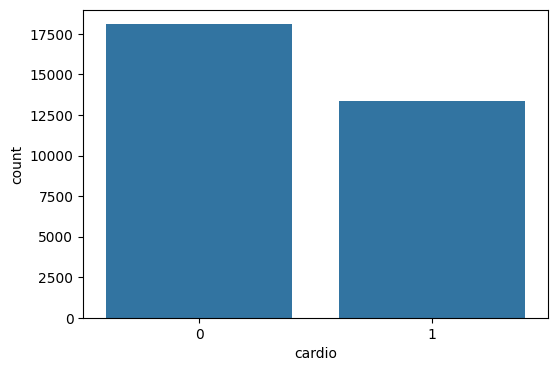

In [ ]:

plt.figure(figsize=(6,4))
sns.countplot(x='cardio', data=df)
plt.show()

In [ ]:

from imblearn.over_sampling import SMOTE

sm = SMOTE()
X = df.drop('cardio', axis=1)
y = df['cardio']
X_res, y_res = sm.fit_resample(X, y)
df_smote = pd.concat([X_res, y_res], axis=1)

print("Original dataset shape:", df['cardio'].value_counts().to_dict())
print("Resampled dataset shape:", df_smote['cardio'].value_counts().to_dict())

Original dataset shape: {0: 18084, 1: 13365}
Resampled dataset shape: {0: 18084, 1: 18084}


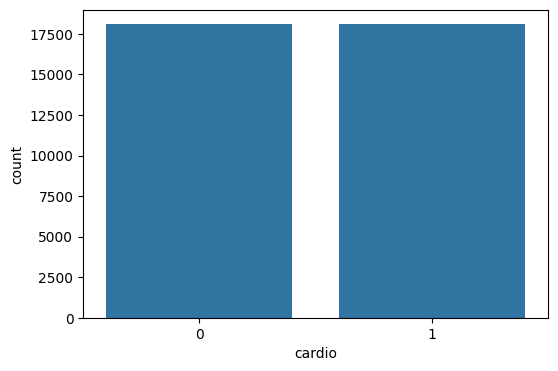

In [ ]:

plt.figure(figsize=(6,4))
sns.countplot(x='cardio', data=df_smote)
plt.show()

In [ ]:

from imblearn.over_sampling import RandomOverSampler

rm = RandomOverSampler()
X = df.drop('cardio', axis=1)
y = df['cardio']
X_res, y_res = rm.fit_resample(X, y)
df_rnd = pd.concat([X_res, y_res], axis=1)
print("Original dataset shape:", df['cardio'].value_counts().to_dict())
print("Resampled dataset shape:", df_rnd['cardio'].value_counts().to_dict())

Original dataset shape: {0: 18084, 1: 13365}
Resampled dataset shape: {0: 18084, 1: 18084}


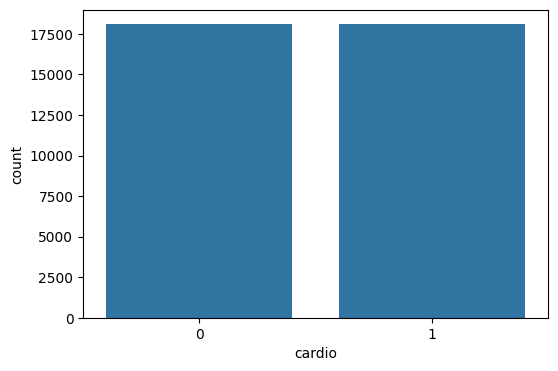

In [ ]:

plt.figure(figsize=(6,4))
sns.countplot(x='cardio', data=df_rnd)
plt.show()

In [ ]:

print("statistics before sampling",df.describe())

statistics before sampling                 age        gender        height        weight         ap_hi  \
count  31449.000000  31449.000000  31449.000000  31449.000000  31449.000000   
mean   19317.988871      1.304207    164.200738     71.687596    124.539636   
std     2459.513409      0.460078      7.291806     11.731791     13.494804   
min    14287.000000      1.000000    143.000000     40.000000     90.000000   
25%    17536.000000      1.000000    159.000000     64.000000    120.000000   
50%    19609.000000      1.000000    165.000000     70.000000    120.000000   
75%    21222.000000      2.000000    169.000000     79.000000    130.000000   
max    23713.000000      2.000000    186.000000    107.000000    170.000000   

              ap_lo  cholesterol     gluc    smoke     alco   active  \
count  31449.000000      31449.0  31449.0  31449.0  31449.0  31449.0   
mean      80.869280          0.0      1.0      0.0      0.0      1.0   
std        7.335848          0.0      0.0    

In [ ]:

print("statistics after smote sampling",df_smote.describe())


statistics after smote sampling                 age        gender        height        weight         ap_hi  \
count  36168.000000  36168.000000  36168.000000  36168.000000  36168.000000   
mean   19413.822799      1.280192    164.137110     71.881280    125.401266   
std     2453.001517      0.449099      7.172509     11.628413     13.694632   
min    14287.000000      1.000000    143.000000     40.000000     90.000000   
25%    17620.000000      1.000000    159.000000     64.000000    120.000000   
50%    19665.000000      1.000000    164.000000     70.000000    120.000000   
75%    21275.000000      2.000000    169.000000     79.000000    130.000000   
max    23713.000000      2.000000    186.000000    107.000000    170.000000   

              ap_lo  cholesterol     gluc    smoke     alco   active  \
count  36168.000000      36168.0  36168.0  36168.0  36168.0  36168.0   
mean      81.243696          0.0      1.0      0.0      0.0      1.0   
std        7.344386          0.0      0.

In [ ]:

print("duplicates after smote",df_smote.duplicated().sum())

duplicates after smote 41


In [ ]:

print("Statistics afetr random sampling",df_rnd.describe())

Statistics afetr random sampling                 age        gender        height        weight         ap_hi  \
count  36168.000000  36168.000000  36168.000000  36168.000000  36168.000000   
mean   19400.005640      1.304662    164.180353     71.939267    125.458914   
std     2451.112397      0.460270      7.297339     11.761176     13.864596   
min    14287.000000      1.000000    143.000000     40.000000     90.000000   
25%    17603.000000      1.000000    159.000000     64.000000    120.000000   
50%    19657.500000      1.000000    165.000000     70.000000    120.000000   
75%    21269.000000      2.000000    169.000000     79.000000    130.000000   
max    23713.000000      2.000000    186.000000    107.000000    170.000000   

              ap_lo  cholesterol     gluc    smoke     alco   active  \
count  36168.000000      36168.0  36168.0  36168.0  36168.0  36168.0   
mean      81.261004          0.0      1.0      0.0      0.0      1.0   
std        7.463951          0.0      0

In [ ]:

print("duplicates after random",df_rnd.duplicated().sum())

duplicates after random 4739


Conclusion Before Training Any Model:

Based on the preprocessing statistics and duplicate analysis before fitting any model, we can clearly conclude the following:

1. Random Oversampling

It works by simply repeating existing minority samples.

This causes a very high number of duplicates (4739 duplicated rows found).

Such repetition can easily lead to overfitting, because the model will memorize repeated samples instead of learning general patterns.

2. SMOTE

SMOTE generates new synthetic samples based on interpolation between minority class neighbors.

The number of duplicates is extremely low (only 39 duplicates), meaning:

The synthetic data is new, not copied.

It increases the diversity of the minority class.

It helps the model learn better decision boundaries.

In [ ]:

from sklearn.preprocessing import RobustScaler

In [ ]:

df['year'] = df['age'] // 10

In [ ]:

scaler = RobustScaler()
numerical_cols = ['age', 'height', 'weight']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [ ]:

df[numerical_cols].describe()

,age,height,weight
count,31449.000000,31449.000000,31449.000000
mean,-0.078950,-0.079926,0.112506
std,0.667258,0.729181,0.782119
min,-1.443842,-2.200000,-2.000000
25%,-0.562398,-0.600000,-0.400000
50%,0.000000,0.000000,0.000000
75%,0.437602,0.400000,0.600000
max,1.113402,2.100000,2.466667


In [ ]:

from sklearn.model_selection import train_test_split

In [ ]:

df = df.sort_values(by='year')

In [ ]:

split_index = int(len(df) * 0.8)

In [ ]:

train = df.iloc[:split_index]
test = df.iloc[split_index:]

In [ ]:

train.shape

(25159, 14)

In [ ]:

test.shape

(6290, 14)

In [ ]:
#ploty

In [ ]:

import plotly.express as px

In [ ]:

fig1 = px.scatter(train, x='age', y='cholesterol', color='gluc',
                 title='Age vs Cholesterol by Glucose Level',
                 labels={'cholesterol': 'Cholesterol Level', 'gluc': 'Glucose Level'})
fig1.show()

In [ ]:

fig2 = px.histogram(train, x='weight', color='cholesterol',
                    title='Weight Distribution by Cholesterol Level',
                    barmode='overlay')
fig2.show()

In [ ]:
#  statistical significance

In [ ]:

import scipy.stats as stats

In [ ]:

contingency_table = pd.crosstab(train['weight'], train['gluc'])
chi2, p_chi2, _, _ = stats.chi2_contingency(contingency_table)
print(f' Chi2 = {chi2}, p-value = {p_chi2}')

 Chi2 = 0.0, p-value = 1.0


In [ ]:

group1 = train[train['weight'] == 0]['age']
group2 = train[train['weight'] == 1]['age']
t_stat, p_ttest = stats.ttest_ind(group1, group2, equal_var=False)
print(f'T-test  = {t_stat}, p-value = {p_ttest}')

T-test  = -0.3619124666283051, p-value = 0.717507374013638


In [ ]:
#((SUPERVISED))
##stratified 5-fold cross-validation

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

In [ ]:
x = train.drop('cardio', axis=1)
y = train['cardio']

In [ ]:
model = RandomForestClassifier(random_state=42)

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
auc_scores = []
all_probs = np.zeros(len(y))

for train_index, val_index in skf.split(x, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]


    model.fit(X_train, y_train)

    y_probs = model.predict_proba(X_val)[:, 1]

    # AUC
    auc = roc_auc_score(y_val, y_probs)
    auc_scores.append(auc)


    all_probs[val_index] = y_probs

print(f'Average AUC-ROC over 5 folds: {np.mean(auc_scores):.4f}')

Average AUC-ROC over 5 folds: 0.5080


In [ ]:
#calibration curves

In [ ]:
from sklearn.calibration import calibration_curve

fraction_of_positives, mean_predicted_value = calibration_curve(y, all_probs, n_bins=10)



In [ ]:
#figure

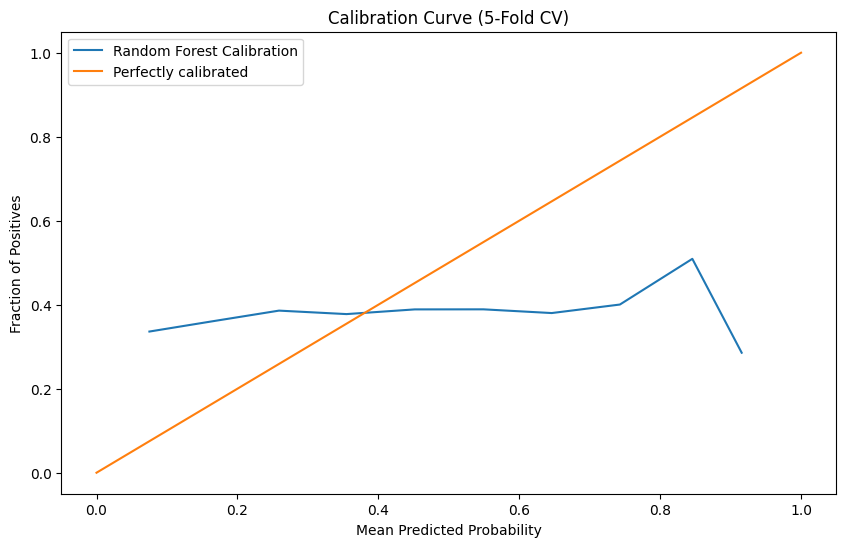

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(mean_predicted_value, fraction_of_positives, label="Random Forest Calibration")
plt.plot([0, 1], [0, 1],label="Perfectly calibrated")
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve (5-Fold CV)')
plt.legend()
plt.show()

In [ ]:
df["age"].describe()

,age
count,31449.000000
mean,-0.078950
std,0.667258
min,-1.443842
25%,-0.562398
50%,0.000000
75%,0.437602
max,1.113402


In [ ]:
df["real_age"] = df["real_age"] / 365
bins = np.arange(0, df['real_age'].max()+ 5 , 5)

fig = px.histogram(
    df,
    x='real_age',
    nbins=len(bins),
    title='Age Distribution (5-year bins)'
)

fig.update_traces(marker_line_width=1, marker_line_color="black")
fig.update_layout(xaxis_title="Age (5-year bins)", yaxis_title="Count")

fig.show()



In [ ]:
bins = np.arange(0, df['real_age'].max() + 5, 5)
df['age_group'] = pd.cut(df['real_age'], bins=bins)

prevalence = df.groupby('age_group')['cardio'].mean() * 100

fig = px.bar(
    x=prevalence.index.astype(str),
    y=prevalence.values,
    title="Disease prevalence across different age groups (5-year bins)",
    labels={'x': 'Age Group', 'y': 'Disease Prevalence (%)'}
)

fig.update_traces(marker_line_width=1, marker_line_color="black")
fig.show()


/tmp/ipython-input-642118303.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

